In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import squidpy as sq
import space as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib import colors
from termcolor import colored

/home/liyuzhe/anaconda3/envs/scape/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/liyuzhe/anaconda3/envs/scape/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
import scipy.stats as stats
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=120,facecolor='w',frameon=True,figsize=(4,4)) 
%config InlineBackend.figure_format='retina'
%matplotlib inline

scanpy==1.9.6 anndata==0.10.3 umap==0.5.4 numpy==1.23.4 scipy==1.11.3 pandas==1.5.3 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.6 louvain==0.8.1 pynndescent==0.5.10


In [4]:
featurePlotCols=["lightgrey","whitesmoke","#ffffcc","#ffeda0","#fed976","#feb24c","#fd8d3c","#fc4e2a","#e31a1c","#bd0026","#800026","#800026"]
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap',featurePlotCols,N=512)

In [5]:
sp.__version__

'0.6.9'

# Cosine similarity 

In [6]:
adata=sc.read('/home/liyuzhe/Notebook/SPACE_rebuttal/NSCLC/NSCLC_cc_adata.h5ad')
adata

/home/liyuzhe/anaconda3/envs/scape/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 97809 × 960
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.CD298', 'Max.CD298', 'Mean.G', 'Max.G', 'Mean.Y', 'Max.Y', 'Mean.R', 'Max.R', 'Mean.DAPI', 'Max.DAPI', 'dualfiles', 'Slide_name', 'tissue', 'Run_name', 'ISH.concentration', 'Dash', 'slide_ID_numeric', 'Run_Tissue_name', 'Panel', 'Diversity', 'totalcounts', 'log10totalcounts', 'background', 'remove_flagged_cells', 'patient', 'cell_type', 'niche', 'prop_tumor_in_100_neighbors', 'leiden', 'cell_comm', 'celltype'
    uns: 'SPACE', 'cell_comm_colors', 'cell_type_colors', 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'niche_colors', 'umap'
    obsm: 'X_umap', 'latent', 'spatial', 'spatial_viz'
    layers: 'counts'
    obsp: 'SPACE_connectivities', 'SPACE_distances'

In [7]:
len(adata.obs.celltype.value_counts())

18

In [7]:
df=pd.DataFrame(index=adata.obs.cell_comm.cat.categories,columns=['SES'])
for i in adata.obs.cell_comm.cat.categories:
    adata_=adata[adata.obs.cell_comm==i].copy()
    sq.gr.spatial_neighbors(adata_, n_neighs=20,coord_type="generic")
    adj=adata_.obsp['spatial_connectivities'].toarray()
    df_=pd.DataFrame(index=adata_.obs.index,columns=adata_.obs.celltype.cat.categories)
    for j in range(len(adj)):
        tmp=adata_[adj[j].nonzero()]
        df_tmp=tmp.obs.celltype.value_counts(normalize=True)
        df_.iloc[j][df_tmp.index]=df_tmp
    df_=df_.fillna(0)
    df_ref=pd.DataFrame(adata_.obs.celltype.value_counts(normalize=True))
    df_ref=df_ref.loc[df_.columns].copy()
    df_cor=pd.DataFrame(cosine_similarity(df_,df_ref.transpose()),index=df_.index,columns=['SES'])
    score=df_cor.mean().values[0]
    df.loc[i,'SES']=score

Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `a

In [8]:
adata_=sc.read('/home/liyuzhe/Notebook/SPACE_rebuttal/NSCLC/NSCLC_cc_adata.h5ad')
sq.gr.spatial_neighbors(adata_, n_neighs=20,coord_type="generic")
adj=adata_.obsp['spatial_connectivities'].toarray()
df_=pd.DataFrame(index=adata_.obs.index,columns=adata_.obs.celltype.cat.categories)
for j in range(len(adj)):
    tmp=adata_[adj[j].nonzero()]
    df_tmp=tmp.obs.celltype.value_counts(normalize=True)
    df_.iloc[j][df_tmp.index]=df_tmp
df_=df_.fillna(0)
df_ref=pd.DataFrame(adata_.obs.celltype.value_counts(normalize=True))
df_ref=df_ref.loc[df_.columns].copy()
df_cor=pd.DataFrame(cosine_similarity(df_,df_ref.transpose()),index=df_.index,columns=['SES'])
score=df_cor.mean().values[0]
df.loc['all','SES']=score

/home/liyuzhe/anaconda3/envs/scape/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:02)


In [9]:
df['group']=df.index.copy()
df=df.reset_index()
df

,index,SES,group
0,CC1,0.757923,CC1
1,CC2,0.699268,CC2
2,CC3,0.780388,CC3
3,CC4,0.74057,CC4
4,CC5,0.964296,CC5
5,CC6,0.720561,CC6
6,all,0.543179,all


In [10]:
df.to_csv('results/NSCLC_SES_uniform_score.csv')

webf NOT subset; don't know how to subset; dropped


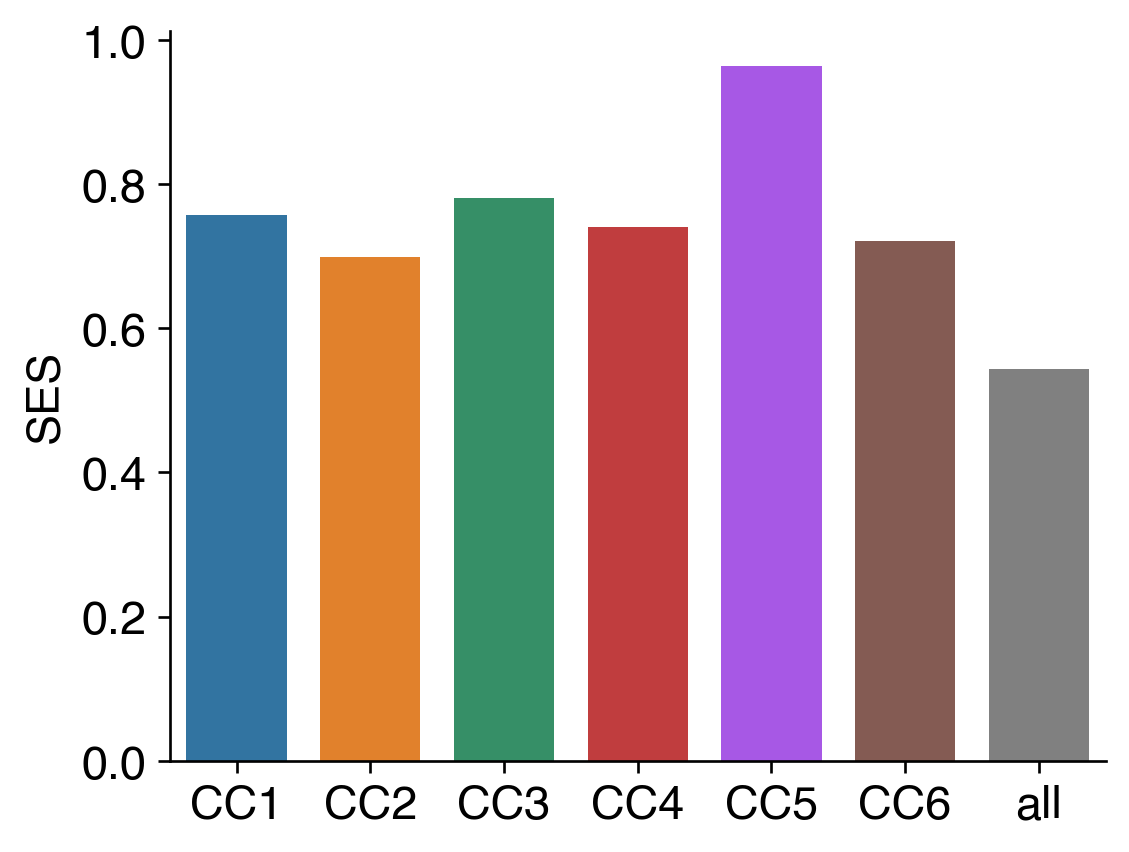

In [11]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5,4))  

sns.barplot(df,x='group',y='SES',width=0.75,
            palette={'CC1': '#1f77b4','CC2': '#ff7f0e','CC3': '#279e68',
                     'CC4': '#d62728','CC5': '#aa40fc','CC6': '#8c564b',
                     'all':'grey'})
ax=plt.gca()
ax.set_ylabel('SES')
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figures/NSCLC_SES_uniform_score.pdf', bbox_inches = 'tight')
plt.show()